In [1]:
import dateutil.parser
import pandas as pd
from dateutil.relativedelta import relativedelta
from ta.volatility import BollingerBands
from ta.trend import sma_indicator
from ta.trend import SMAIndicator
from ta.trend import macd
from ta.utils import dropna

from ta.momentum import RSIIndicator


In [3]:
# Read csvs
#Need to modify standard commodities to fit 247 BTC model
GLD = pd.read_csv("GLD_With_Weekends.csv")
SPY = pd.read_csv("SPY_With_Weekends.csv")
TSLA = pd.read_csv("TSLA_With_Weekends.csv")
Sent = pd.read_csv("sentiment_dataset.csv")
BTC = pd.read_csv("BTC.csv")
print(BTC["Closing Price (USD)"])
GAD = pd.read_csv("GAD.csv")
GAM = pd.read_csv("GAM.csv")
tt = pd.read_csv("n-transactions-total.csv")
hr = pd.read_csv("hash-rate.csv")
mc = pd.read_csv("market-cap.csv")
bs = pd.read_csv("blocks-size.csv")
volume = pd.read_csv("bitcoinity_data.csv")
spread = pd.read_csv("bitcoinity_spread_data.csv")
spread["Time"] = spread["Time"].apply(lambda x: x[0 : x.index(" ")])
spread.fillna(0, inplace=True)
volume['Time'] = volume['Time'].str[:10]
volume.fillna(0, inplace=True)
volume['Total'] = volume['CAD'] + volume['EUR'] + volume['GBP'] + volume['JPY'] + volume['KRW'] + volume['USD']
print("Volume: " + str(volume["Time"][0]) + " " + str(volume["Time"][len(volume) - 1]))
print("Gold: " + str(GLD["Date W/ Weekend"][0]) + " " + str(GLD["Date W/ Weekend"][len(GLD) - 1]))
print("SPY: " + str(SPY["Date W/ Weekends"][0]) + " " + str(SPY["Date W/ Weekends"][len(SPY) - 1]))
print("TSLA: " + str(TSLA["Date W/ Weekends"][0]) + " " + str(TSLA["Date W/ Weekends"][len(TSLA) - 1]))
print("Sentiment: " + str(Sent["date"][0]) + " "  + str(Sent["date"][len(Sent) - 1]))
print("GAD: " +str(GAD["Day"][0]) + " " + str(GAD["Day"][len(GAD) - 1]))
print("GAM: " + str(GAM["Month"][0]) + " " + str(GAM["Month"][len(GAM) - 1]))
print("BTC: " + str(BTC["Date"][0]) + " " + str(BTC["Date"][len(BTC) - 1]))

0         123.654990
1         125.455000
2         108.584830
3         118.674660
4         121.338660
            ...     
2749    59822.901677
2750    59853.197242
2751    63223.884391
2752    62926.557176
2753    63346.789035
Name: Closing Price (USD), Length: 2754, dtype: float64
Volume: 2013-09-18 2021-04-29
Gold: 1/2/2008 4/9/2021
SPY: 1/2/2008 4/9/2021
TSLA: 6/30/2010 4/9/2021
Sentiment: 2021-04-15 2013-09-30
GAD: 4/14/2021 4/16/2013
GAM: 2013-05 2021-04
BTC: 2013-10-01 2021-04-15


In [4]:
# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=BTC["Closing Price (USD)"], window=20, window_dev=2, fillna=True)
# Add Bollinger Bands features
BTC['bb_bbm'] = indicator_bb.bollinger_mavg()
BTC['bb_bbh'] = indicator_bb.bollinger_hband()
BTC['bb_bbl'] = indicator_bb.bollinger_lband()
BTC['bb_bbw'] = indicator_bb.bollinger_wband()
BTC['bb_bbp'] = indicator_bb.bollinger_pband()

BTC["sma10"] = SMAIndicator(close=BTC["Closing Price (USD)"], window=10, fillna=True).sma_indicator()
BTC["sma20"] = SMAIndicator(close=BTC["Closing Price (USD)"], window=20, fillna=True).sma_indicator()
BTC["sma100"] = SMAIndicator(close=BTC["Closing Price (USD)"], window=100, fillna=True).sma_indicator()
BTC["sma200"] = SMAIndicator(close=BTC["Closing Price (USD)"], window=200, fillna=True).sma_indicator()
BTC["MACD"] = macd(close=BTC["Closing Price (USD)"], window_slow=26, window_fast=12, fillna=True)
BTC["RSI"] = RSIIndicator(close=BTC["Closing Price (USD)"], window=14, fillna=True).rsi()



In [13]:
# Merge DataFrames

start_date = dateutil.parser.isoparse("2013-10-01")
end_date = dateutil.parser.isoparse("2021-04-08")
GLD_format = "%-m/%-d/%Y"
Sentiment_format = "%Y-%m-%d"
GAM_format = "%Y-%m"

columns =["HR " + x for x in hr.columns.to_list()] + ["MC " + x for x in mc.columns.to_list()] + ["BS " + x for x in bs.columns.to_list()] + ["TT " + x for x in tt.columns.to_list()] + ["GLD " + x for x in GLD.columns.to_list()] + ["SPY " + x for x in SPY.columns.to_list()] + ["TSLA " + x for x in TSLA.columns.to_list()] + ["GAD " + x for x in GAD.columns.to_list()] + ["GAM " + x for x in GAM.columns.to_list()] + ["SENT " + x for x in Sent.columns.to_list()] + ["BTC " + x for x in BTC.columns.to_list()] + ["VOL " + x for x in volume.columns.to_list()] + ["SPREAD " + x for x in spread.columns.to_list()]


data_list = []
while start_date <= end_date:
    start_date = start_date + relativedelta(days=1)
    hr_day = hr.loc[hr["Date"] == start_date.strftime(GLD_format)]
    mc_day = mc.loc[mc["Date"] == start_date.strftime(GLD_format)]
    bs_day = bs.loc[bs["date"] == start_date.strftime(GLD_format)]
    tt_day = tt.loc[tt["Date"] == start_date.strftime(GLD_format)]
    gold_day = GLD.loc[GLD["Date W/ Weekend"] == start_date.strftime(GLD_format)]
    spy_day = SPY.loc[SPY["Date W/ Weekends"] == start_date.strftime(GLD_format)]
    tsla_day = TSLA.loc[TSLA["Date W/ Weekends"] == start_date.strftime(GLD_format)]
    sent_day = Sent.loc[Sent["date"] == start_date.strftime(Sentiment_format)]
    ga_day = GAD.loc[GAD["Day"] == start_date.strftime(GLD_format)]
    ga_month = GAM.loc[GAM["Month"] == start_date.strftime(GAM_format)]
    btc_day = BTC.loc[BTC["Date"] == start_date.strftime(Sentiment_format)]
    vol_day = volume.loc[volume["Time"] == start_date.strftime(Sentiment_format)]
    spread_day = spread.loc[spread["Time"] == start_date.strftime(Sentiment_format)]
    data = sum(hr_day.values.tolist(), []) + sum(mc_day.values.tolist(), [])+ sum(bs_day.values.tolist(), []) + sum(tt_day.values.tolist(), []) +sum(gold_day.values.tolist(), []) + sum(spy_day.values.tolist(),[]) + sum(tsla_day.values.tolist(),[]) + sum(ga_day.values.tolist(),[]) + sum(ga_month.values.tolist(),[]) + sum(sent_day.values.tolist(),[]) + sum(btc_day.values.tolist(),[]) + sum(vol_day.values.tolist(),[]) + sum(spread_day.values.tolist(), [])
    data_list.append(data)
df = pd.DataFrame(columns=columns, data=data_list)
del df["GAD Unnamed: 2"]
del df["GAD in 8 month segments"]
"""
#inserting new feature Trailing 30-day BTC Price
df["BTC Trailing 30-Day Avg"]=df["BTC Closing Price (USD)"]
for i in range(30,len(df)):
    df["BTC Trailing 30-Day Avg"][i]=df["BTC Closing Price (USD)"][i-30:i].mean()
"""
def get_data():
    rdf = df.copy(deep=True)
    return rdf  
print(df) 


        HR Date  HR hash-rate    MC Date  MC market-cap    BS date  \
0     10/2/2013  1.213246e+03  10/2/2013   1.486635e+09  10/2/2013   
1     10/3/2013  1.538751e+03  10/3/2013   1.224109e+09  10/3/2013   
2     10/4/2013  1.538751e+03  10/4/2013   1.224109e+09  10/4/2013   
3     10/5/2013  1.538751e+03  10/5/2013   1.438749e+09  10/5/2013   
4     10/6/2013  1.900663e+03  10/6/2013   1.438749e+09  10/6/2013   
...         ...           ...        ...            ...        ...   
2742   4/5/2021  1.506721e+08   4/5/2021   1.080000e+12   4/5/2021   
2743   4/6/2021  1.656242e+08   4/6/2021   1.080000e+12   4/6/2021   
2744   4/7/2021  1.656242e+08   4/7/2021   1.050000e+12   4/7/2021   
2745   4/8/2021  1.656242e+08   4/8/2021   1.050000e+12   4/8/2021   
2746   4/9/2021  1.748256e+08   4/9/2021   1.050000e+12   4/9/2021   

      BS block-size    TT Date  TT n-transactions-total GLD Date W/ Weekend  \
0       11295.90301  10/2/2013                 24732277           10/2/2013   
1

In [43]:
# Prepare df for training
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
# delete unnecesary date columns
date_columns = ["SPREAD Time", "VOL Time", "BTC Date","HR Date", "MC Date", "BS date", "TT Date", "GLD Date W/ Weekend", "SPY Date W/ Weekends", "TSLA Date W/ Weekends", "GAD Day", "GAM Month", "SENT date"]
data_proc = get_data()
data_proc = data_proc.drop(date_columns, axis = 1)
data_proc["SPREAD Spread"].fillna(0, inplace=True)


data_proc = data_proc.drop(["GAM  Bitcoin"], axis =1)
data_proc = data_proc.drop(["BTC Currency"], axis=1)
unnecessary_columns = ["BTC 24h Open (USD)", "GLD Open", "GLD High", "GLD Low", "GLD Adj Close", "SPY Open", "SPY High", "SPY Low", "SPY Adj Close", "TSLA Open", "TSLA High", "TSLA Low", "TSLA Adj Close", "VOL KRW"]
data_proc = data_proc.drop(unnecessary_columns, axis = 1)

# Getting X and Y Values (I let the Y Value be the next day's 24H Close)


# Add pct change values
data_proc["GLD Change"] = data_proc["GLD Close"].pct_change()
data_proc["TSLA Change"] = data_proc["TSLA Close"].pct_change()
data_proc["SPY Change"] = data_proc["SPY Close"].pct_change()
# data_proc["VOL Total Change"] = data_proc["VOL Total"].pct_change()
# Add gap features
data_proc["BTC diff"] = data_proc["BTC 24h High (USD)"] - data_proc["BTC 24h Low (USD)"]
for x in range(3):
    data_proc["BTC Change " + str(x + 1) + " Day"] = data_proc["BTC Closing Price (USD)"].pct_change(periods = x + 1)
for x in range(3):
    data_proc["VOL Total Change " + str(x + 1) +  " Day"] = data_proc["VOL Total"].pct_change(periods = x + 1)

data_proc = data_proc.drop(data_proc.head(3).index)
Y = data_proc["BTC Closing Price (USD)"]
# Make Y the classification target
Y = Y.pct_change()
Y = Y.apply(lambda x: 0 if x <= 0 else 1)
Y = Y.drop(Y.head(1).index) # drop first 2018-01-01
data_proc = data_proc.drop(data_proc.tail(1).index) # drop last row 2021-04-09



# Now the Ys are each one day ahead of the Xs at the same index
data_proc["Y"] = Y.values

# convert large range Xs to log of themselves
data_proc["HR hash-rate"] = np.log(data_proc["HR hash-rate"])
data_proc["MC market-cap"] = np.log(data_proc["MC market-cap"])
data_proc["BS block-size"] = np.log(data_proc["BS block-size"])
data_proc["TT n-transactions-total"] = np.log(data_proc["TT n-transactions-total"])
data_proc["GLD Volume"] = np.log(data_proc["GLD Volume"])
data_proc["SPY Volume"] = np.log(data_proc["SPY Volume"])
data_proc["TSLA Volume"] = np.log(data_proc["TSLA Volume"])
data_proc["BTC Closing Price (USD)"] = np.log(data_proc["BTC Closing Price (USD)"])
data_proc["BTC 24h High (USD)"] = np.log(data_proc["BTC 24h High (USD)"])
data_proc["BTC 24h Low (USD)"] = np.log(data_proc["BTC 24h Low (USD)"])

data_proc["BTC bb_bbm"] = np.log(data_proc["BTC bb_bbm"])
data_proc["BTC bb_bbh"] = np.log(data_proc["BTC bb_bbh"])
data_proc["BTC bb_bbl"] = np.log(data_proc["BTC bb_bbl"])
# data_proc["BTC bb_bbq"] = np.log(data_proc["BTC bb_bbq"])

data_proc["BTC sma20"] = np.log(data_proc["BTC sma20"])
data_proc["BTC sma100"] = np.log(data_proc["BTC sma100"])
data_proc["BTC sma200"] = np.log(data_proc["BTC sma200"])

"""
data_proc["VOL CAD"] = np.log(data_proc["VOL CAD"])
data_proc["VOL EUR"] = np.log(data_proc["VOL EUR"])
data_proc["VOL GBP"] = np.log(data_proc["VOL GBP"])
data_proc["VOL JPY"] = np.log(data_proc["VOL JPY"])
data_proc["VOL USD"] = np.log(data_proc["VOL USD"])
data_proc["VOL Total"] = np.log(data_proc["VOL Total"])

"""


'''
for col in data_proc.columns.values:
    for x in range(3):
        data_proc[col + " " + str(x + 1)] = data_proc[col].shift(periods=x + 1)

# drop first 6 rows
data_proc = data_proc.drop(data_proc.head(7).index) # drop first week of rows
'''
'''
for col in data_proc.columns.values:
    data_proc[col + " delta"] = data_proc[col].pct_change()
'''
X = data_proc.drop("Y", axis = 1)
Y = data_proc["Y"]

data_proc = data_proc.sample(frac = 1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(X_train)
X_train = X_train.loc[: ,sel.get_support()]
X_test = X_test.loc[: , sel.get_support()]

best = SelectKBest( k=16).fit(X_train, y_train)

X_train = X_train.loc[: ,best.get_support()]
X_test = X_test.loc[: , best.get_support()]

# Make data available
def get_all_data():
    return data_proc.copy()
def get_training_data():
    return X_train.copy(), y_train.copy()

# Only for final validation, do not contaminate
def get_test_data():
    return X_test.copy(), y_test.copy()

get_training_data()[0]


,BS block-size,TT n-transactions-total,GLD Volume,SPY Volume,TSLA Close,BTC bb_bbw,BTC sma200,BTC RSI,VOL CAD,VOL EUR,VOL GBP,VOL JPY,VOL Total,VOL Total Change 1 Day,VOL Total Change 2 Day,VOL Total Change 3 Day
2276,12.450741,20.004817,15.936873,17.246629,86.188004,11.264488,9.138280,46.275883,15.760814,2536.504531,24.031031,4.971930,6248.299313,-0.129022,-0.209363,-0.555963
1438,11.796037,19.348001,16.014955,17.971778,68.680000,22.016434,7.731514,50.476264,55.569850,5133.052689,0.000000,51.224536,8784.768142,-0.534765,-0.108363,-0.370971
2232,12.424145,19.976241,15.679374,17.654632,69.986000,20.043044,9.133032,47.294725,59.087922,3597.598351,0.390263,0.055886,7009.092743,-0.124250,0.373474,1.197823
1612,11.981988,19.526186,16.117525,18.750583,67.024002,36.572140,9.068270,55.766649,19.798706,7909.015572,1.865223,1.861243,13671.072099,-0.160484,-0.245743,-0.189672
1863,12.158129,19.687397,15.848751,17.998856,70.279999,3.453651,8.863571,49.750167,47.008115,2411.158675,2.058392,2.129593,4685.045246,-0.195084,-0.092897,0.371010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,12.005154,19.544382,15.775887,18.530446,53.226002,33.032243,9.141355,35.031850,57.274974,8518.993532,0.728364,1.659870,17897.235107,-0.556405,-0.529131,0.345102
1098,11.359434,18.893333,17.008974,18.602570,42.282001,3.347808,6.317987,56.319474,85.123216,3349.206448,71.113392,17.501319,3954.348154,0.328166,1.238020,0.082555
1133,11.409488,18.946592,16.064758,18.486207,38.987999,19.335970,6.390085,63.331857,51.494951,5191.329353,89.288869,14.643345,6314.105697,0.545304,0.493337,0.911087
1297,11.631258,19.184637,16.563294,18.519528,61.119999,13.225007,6.818201,67.057864,57.097546,6528.693466,7.753048,310.013687,8889.195779,-0.265375,0.055650,0.138057


In [31]:
data = get_all_data()
# Correlation list
corr = data.corr()

correlations_s = corr['Y']
print('Correlations to Y: \n' + correlations_s.abs().sort_values()[::
-1].to_string() +'\n\n\n')

Correlations to Y: 
Y                          1.000000
BTC RSI                    0.071606
BTC Change 1 Day           0.063181
BTC bb_bbp                 0.061319
SENT compound              0.049958
SENT neg                   0.045703
BTC bb_bbw                 0.042180
SENT neu                   0.039857
TT n-transactions-total    0.034435
BS block-size              0.034334
VOL GBP                    0.030817
BTC Change 2 Day           0.028237
VOL JPY                    0.027213
VOL CAD                    0.027058
TSLA Close                 0.025652
SPY Volume                 0.025203
TSLA Change                0.025035
SPY Change                 0.024422
SPY Close                  0.021422
VOL Total Change 2 Day     0.020704
VOL Total Change 3 Day     0.020668
VOL EUR                    0.020145
VOL Total                  0.019010
VOL Total Change 1 Day     0.017652
GLD Volume                 0.016499
BTC MACD                   0.015651
HR hash-rate               0.014982
MC marke

<AxesSubplot:>

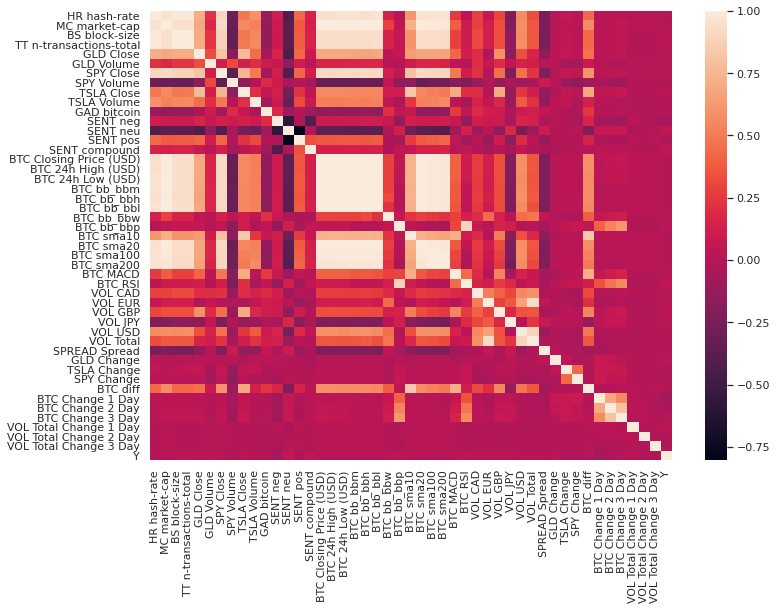

In [11]:
# Correlation heatmap
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [68]:
# Run simple models
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier

xtrain, ytrain = get_training_data()
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
print(ytrain.value_counts(normalize=True) * 100)

def test_model(mod, name):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
    scores = cross_val_score(mod, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print(name + ' accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


test_model(LogisticRegression(), "Logistic Regression")
test_model(KNeighborsClassifier(), "K Neighbors")

test_model(DecisionTreeClassifier(), "Decision Tree")
test_model(RidgeClassifier(), "Ridge Classifier")
test_model(PassiveAggressiveClassifier(), "PA")
# test_model(GaussianProcessClassifier(), "GP")
test_model(GradientBoostingClassifier(), "Gradient Boosting")
test_model(RandomForestClassifier(), "Random Forest")
test_model(AdaBoostClassifier(), "AdaBoost")
test_model(MLPClassifier(), "MLP")

test_model(VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('rr', RidgeClassifier(alpha = 2.5)), ('ab', AdaBoostClassifier())]), "voting")

1    54.557885
0    45.442115
Name: Y, dtype: float64
Logistic Regression accuracy: 0.543 (0.008)
K Neighbors accuracy: 0.519 (0.033)
Decision Tree accuracy: 0.507 (0.037)
Ridge Classifier accuracy: 0.555 (0.029)
PA accuracy: 0.503 (0.037)
Gradient Boosting accuracy: 0.541 (0.028)
Random Forest accuracy: 0.522 (0.032)
AdaBoost accuracy: 0.528 (0.033)
MLP accuracy: 0.506 (0.039)
voting accuracy: 0.539 (0.030)


In [ ]:
# Parameter tuning
from sklearn.model_selection import RandomizedSearchCV
"""
options = dict(alpha=[0.1, 0.5, 1.0, 1.5, 2.5, 5, 10])
r = RandomizedSearchCV(RidgeClassifier(), options, random_state=42)
r.fit(xtrain, ytrain)
print(r.best_params_)
test_model(RidgeClassifier(alpha=2.5), "ro")

options = dict(n_estimators=[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], max_features = ['auto', 'sqrt'], max_depth = [int(x) for x in np.linspace(10, 110, num = 11)], min_samples_split = [2, 5, 10], min_samples_leaf = [1, 2, 4], bootstrap = [True, False])
r = RandomizedSearchCV(RandomForestClassifier(), options, random_state=42, verbose=3)
r.fit(xtrain, ytrain)
print(r.best_params_)
"""

rf accuracy: 0.540 (0.030)


In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier

xtrain, ytrain = get_training_data()

def build():
    model = Sequential()
    model.add(Dense(64, input_dim=16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model;

estimator = []
estimator.append(("standardize", StandardScaler()))
estimator.append(("nn",KerasClassifier(build_fn=build, epochs=10, batch_size=32, verbose=1)))
pipe = Pipeline(estimator)
kfold = StratifiedKFold()
results = cross_val_score(pipe, xtrain, ytrain, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#test_model(VotingClassifier(estimators=[('mlp', MLPClassifier()), ('rf', RandomForestClassifier()), ('rr', RidgeClassifier(alpha = 2.5)), ('ab', AdaBoostClassifier())], voting="hard"), "soft")



Epoch 1/10
55/55 [==============================] - 1s 2ms/step - loss: 0.7098 - accuracy: 0.5434
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5403
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5517
Epoch 4/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5623
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5749
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5729
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5539
Epoch 8/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5849
Epoch 9/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5691
Epoch 10/10
14/14 [==============================] - 0s 1ms/step - loss: 62.1199 - accuracy: 0.5399
Epoch 1/10
55/55 [

In [101]:
# Test Models

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import RidgeClassifier

xtest, ytest = get_test_data()
xtrain, ytrain = get_training_data()

# scale Xs
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
scaler = MinMaxScaler()
scaler.fit(xtest)
xtest = scaler.transform(xtest)
print(ytest.value_counts(normalize=True) * 100)

ridge = RidgeClassifier(alpha=2.5)
ridge.fit(xtrain, ytrain)

yhat = ridge.predict(xtest)
print(accuracy_score(ytest, yhat))
print(precision_score(ytest, yhat))
print(recall_score(ytest, yhat))

clf = KerasClassifier(build_fn=build, epochs=10, batch_size=32, verbose=0)
clf.fit(xtrain, ytrain)
yhat = clf.predict(xtest)
print(accuracy_score(ytest, yhat))
print(precision_score(ytest, yhat))
print(recall_score(ytest, yhat))

1    52.094718
0    47.905282
Name: Y, dtype: float64
0.5282331511839709
0.5314685314685315
0.7972027972027972
0.5482695810564663
0.5381526104417671
0.9370629370629371
/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a209e17-199c-4870-98fa-a9ef0ffeed4c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>